## Hoja de Trabajo No. 5

A continuación encontrarán un Notebook interactivo desarrollado por Anaconda.org

La idea de estet Notebook es repasar lo que hacen diferentes algoritmos (Modelos).  Todos estos modelos han sido estudiados y trabajados en clase, con la excepción de uno.

El código utlizado es muy parecido al que se ha desarrollado en clase.  

**Problema**

Ustedes han sido contratados para ayudar a un herbario de renombre.  Han presentado este código de Anaconda.org al investigador principal y le ha parecido muy interesante.  Sin embargo, el investigador siente que hace fala algo, o que podría hacerse una mejor presentación.

Su tarea es ver si es correcto el presentimiento del investigador...¿puede hacerse más eficiente, utilizarse un código más "legible", presentarse mejor?


## 1. Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

## 2. Import Libraries

In [ ]:
import warnings
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


warnings.filterwarnings("ignore")

## Load Dataset

Loading .csv dataset from url provided by kaggle, using Pandas

In [ ]:
url = 'https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/iris/iris.csv'
response = requests.get(url)
csv_data = response.content.decode('utf-8')
dataset = pd.read_csv(io.StringIO(csv_data))

## 3. Sumarize the Dataset

The data has 150 instances and 5 attributes 

In [ ]:
# Print the shape of the data
print(dataset.shape)

The 5 attributes are:
- Id: numerical identifier of each record
- SepalLengthCm: length of the sepal in centimeters (numerical variable)
- SepalWidthCm: width of the sepal in centimeters (numerical variable)
- PetalLengthCm: petal length in centimeters (numerical variable)
- PetalWidthCm: petal width in centimeters (numerical variable)

In summary, all numerical variables measure different dimensions of Iris flower sepals and petals, while the categorical variable indicates to which species each record belongs.

In [ ]:
# Print the first rows of the data
print(dataset.head())

Some conclusions that can be drawn from the descriptive statistics of the data set are:

The numerical variables have different ranges and standard deviations. For example, sepal length ranges from 4.3 cm to 7.9 cm, while petal width ranges from 0.1 cm to 2.5 cm. In addition, the standard deviations for petal length and petal width are much larger than the standard deviations for sepal length and sepal width.

The median sepal length is 5.84 cm, the median sepal width is 3.05 cm, the median petal length is 3.76 cm, and the median petal width is 1.19 cm.

The median sepal length is 5.8 cm, the median sepal width is 3.0 cm, the median petal length is 4.35 cm and the median petal width is 1.3 cm.

Most of the values in the numerical variables are close to their respective 25% and 75% quartiles, suggesting that the distribution of the variables is not highly skewed to one side.

In [ ]:
# Describe some basic statistics about the data
dataset.iloc[:,1:].describe()

## 4. Data cleansing

Backing up the data set is a good practice that helps ensure data integrity and protect against errors and loss of information.

In [ ]:
# First, create a dataset backup
dataset_backup = dataset

It is important to ensure that there is no missing data. If there is any missing data, it is replaced by the mode or average of the column. However, in this case there is no missing data. 

In [ ]:
# graph to show missing values
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

The "Id" column has been removed because this column does not provide relevant information for further analysis or modeling and only serves as a unique identifier for each record in the dataset. Therefore, removing this column will not affect further analysis or modeling and may simplify the data set.

In [ ]:
# Remove first column - Id
dataset = dataset.drop('Id',axis=1)
print(dataset.head())

It is important to verify that the data is balanced as this can significantly affect the accuracy and performance of the models.

In this case, it can be seen that they are balanced so no changes were made. 

In [ ]:
# Class distribution, to see the number of rows that belong to each species
print(dataset.groupby('Species').size())

## 5. Data Visualization

### 5.1. Univariate Plots

Box-and-whisker plots were plotted to represent the distribution of a set of numerical data. 

#DESCRIPCION DE LAS GRAFICAS

In [ ]:
# Box and whisker plots. Univariate plots, one for each individual variable
fig=plt.figure(figsize=(10,5), dpi=100, facecolor='w', edgecolor='k')
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Histograms were also made, from which the following observations were made:
#DESCRIPCION DE LAS GRAFICAS

In [ ]:
# Histograms. Create a histogram of each input variable to get an idea of the distribution
dataset.hist()
plt.show()

### 5.2. Multivariate Plots

Scatterplot matrices were made to view all pairs of attributes and to detect correlations and relationships. 


In [ ]:
# Scatter plot matrix
scatter_matrix(dataset)
plt.show()

## 6. Evaluate Some Algorithms

In this section, the dataset was divided in two, 80% to train, evaluate and select among our models and 20% retained as validation dataset. 

Then, different models were programmed for the problem and their accuracy was evaluated. 

### 6.1. Create a validation dataset

The original data set is divided into two separate sets: one for training and one for validation. The purpose of doing this is to allow the model to be trained on one dataset and its performance evaluated on a separate dataset.

The X variable contains the feature (predictor) columns of the data set, while the y variable contains the target variable column (in this case, the species of the flower). 

In [ ]:
# Split-out validation dataset
array = dataset.values
# All rows and colums except species column
X = array[:,0:4]
# Species column
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### 6.2. Build models and evaluate them

We will use stratified 10-fold cross validation to estimate model accuracy: split the dataset in 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. 

In addition, the hyperparameters of the models were adjusted to improve their performance, using grid search.


Test 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

In [ ]:
from sklearn.model_selection import GridSearchCV

# define models to evaluate
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# define hyperparameters for grid search
param_grid = {
    'LR': {'C': [0.1, 1, 10]},
    'LDA': {'solver': ['svd', 'lsqr']},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'CART': {'max_depth': [3, 5, 7]},
    'NB': {},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# evaluate each model using grid search
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    if name in param_grid:
        grid = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=kfold, scoring='accuracy')
        grid_result = grid.fit(X_train, Y_train)
        best_params = grid_result.best_params_
        model = model.set_params(**best_params)
        
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.975000 (0.038188)
CART: 0.958333 (0.055902)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


As can be seen from the above results, the best model for the present problem was Support Vector Machines (SVM) with the highest accuracy of 98%, followed by Linear Discriminant Analysis (LDA) with an accuracy of 97.5%.

The models with the lowest accuracy were Gaussian Naive Bayes (NB) with 95% and Classification and Regression Trees (CART) with almost 96%, although it should be noted that these are not bad accuracies either. 

These results can be seen in more detail in the following box-and-whisker plots.

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']
[array([1.        , 1.        , 1.        , 1.        , 0.91666667,
       0.91666667, 1.        , 1.        , 0.91666667, 0.91666667]), array([1.        , 1.        , 1.        , 0.91666667, 0.91666667,
       1.        , 1.        , 1.        , 0.91666667, 1.        ]), array([1.        , 0.91666667, 1.        , 1.        , 0.91666667,
       1.        , 1.        , 1.        , 0.91666667, 1.        ]), array([1.        , 0.91666667, 1.        , 1.        , 0.91666667,
       0.91666667, 1.        , 1.        , 0.83333333, 1.        ]), array([1.        , 0.91666667, 1.        , 0.91666667, 0.91666667,
       0.91666667, 1.        , 1.        , 0.83333333, 1.        ]), array([1.        , 1.        , 1.        , 1.        , 0.91666667,
       1.        , 1.        , 1.        , 0.91666667, 1.        ])]


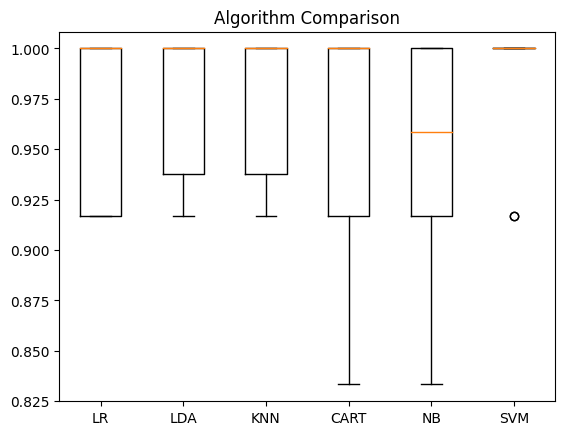

In [ ]:
# Compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## 7. Making predictions and evaluate them

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Evaluate predictions by comparing them to the expected results in the validation set
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))